# Solución para el reto JOBarcelona '23

In [1]:
#Importamos las librerias necesarias

from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import shapiro
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV


In [2]:
drive.mount ('/content/drive')
%cd "/content/drive/MyDrive/Hackathons/Hackathon 23'"

Mounted at /content/drive
/content/drive/MyDrive/Hackathons/Hackathon 23'


In [3]:
df = pd.read_csv('supply_chain_train.csv', index_col='train_idx')
df = df.iloc[: , 1:]
df

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
train_idx,,,,,,,,,,,,,,,,,,,,
0,54,F,1,Unknown,Single,Unknown,Blue,36,1,3,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,58,F,4,High School,Married,Unknown,Blue,48,1,4,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,1,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,3,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,49,F,2,High School,Married,$40K - $60K,Blue,39,5,3,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,44,F,1,Graduate,Single,$40K - $60K,Blue,38,3,2,5,4142.0,2517,1625.0,0.809,2104,44,0.833,0.608,0
8097,53,F,3,High School,Divorced,Unknown,Blue,36,4,3,6,7939.0,0,7939.0,0.551,2269,42,0.312,0.000,0
8098,42,F,4,Graduate,Unknown,Less than $40K,Blue,32,3,1,2,2314.0,1547,767.0,0.804,4678,74,1.000,0.669,1


## Definición de las variables:

**CLIENTNUM:** Identificador único para cada cliente. (Integer)

**Attrition_Flag:** Indicador de si el cliente ha abandonado el banco o se queda (Boolean)

Attrited Customer -> 0
Existing Customer -> 1

**Customer_Age:** Edad del cliente. (Integer)

**Gender:** Sexo del cliente. (String)

**Dependent_count:**Número de personas a cargo que tiene el cliente. (Integer)

**Education_Level:** Nivel educativo del cliente. (String)

**Marital_Status:** Marital status of customer. (String)

**Income_Category:** Categoría de ingresos del cliente. (String)

**Card_Category:** Tipo de tarjeta del cliente. (String)

**Months_on_book:** El tiempo que el cliente ha estado en los libros. (Integer)

**Total_Relationship_Count:** Número total de relaciones que tiene el cliente con el proveedor de la tarjeta de crédito. (Integer)

**Months_Inactive_12_mon:** Número de meses que el cliente ha estado inactivo en los últimos doce meses.(Integer)

**Contacts_Count_12_mon:** Número de contactos que ha tenido el cliente en los últimos doce meses. (Integer)

**Credit_Limit:** Límite de crédito del cliente. (Integer)

**Total_Revolving_Bal:** Saldo renovable total del cliente. (Integer)

**Avg_Open_To_Buy:** Ratio medio de apertura a la compra del cliente. (Integer)

**Total_Amt_Chng_Q4_Q1:** Importe total cambiado del trimestre 4 al trimestre 1. (Integer)

**Total_Trans_Amt:** Importe total de la transacción. (Integer)

**Total_Trans_Ct:** Recuento total de transacciones. (Integer)

**Total_Ct_Chng_Q4_Q1:** Recuento total cambiado del trimestre 4 al trimestre 1. (Integer)

**Avg_Utilization_Ratio:** Ratio de utilización media del cliente. (Integer)

**Months_Inactive_12_mon:** Número de meses que el cliente ha estado inactivo en los últimos doce meses. (Integer)

**Contacts_Count_12_mon:** Número de contactos que ha tenido el cliente en los últimos doce meses. (Integer)

**Credit_Limit:** Límite de crédito del cliente. (Integer)

**Total_Revolving_Bal:** Saldo rotativo total del cliente. (Integer)

**Avg_Open_To_Buy:** Ratio medio de apertura a compra del cliente. (Integer)

**Total_Amt_Chng_Q4_Q1:** Importe total cambiado del trimestre 4 al trimestre 1. (Integer)

**Total_Trans_Amt:** Importe total de la transacción. (Integer)

**Total_Trans_Ct:** Recuento total de transacciones.. (Integer)

**Total_Ct_Chng_Q4_Q1:** Recuento total cambiado del trimestre 4 al trimestre 1. (Integer)

**Avg_Utilization_Ratio:** Ratio de utilización media del cliente. (Integer)

En lugar de entrenar directamente el Dataframe 'train', haremos un split train test para per si obtenemos un buen relutado antes de transformar el Dataframe 'test' entero.

# Preprocesamiento

In [ ]:
df.dtypes

Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Attrition_Flag                int64
dtype: object

In [ ]:
df.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

Podemos ver en un primer vistazo que hay algunas variables que tienen valores 'Unknown'. Buscamos todas las variables que los contienen

In [ ]:
df.isin(['Unknown']).any()

Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level              True
Marital_Status               True
Income_Category              True
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
Attrition_Flag              False
dtype: bool

'Education_Level', 'Marital_Status' i 'Income_Category' son las variables que contienen valores desconocidos.

Reemplazaremos esos valores por el valor más común

In [ ]:
df.Income_Category.value_counts()

Less than $40K    3701
$40K - $60K       1453
$80K - $120K      1237
$60K - $80K       1122
$120K +            588
Name: Income_Category, dtype: int64

In [ ]:
df.Education_Level.value_counts()

Graduate         2528
High School      1619
Unknown          1205
Uneducated       1171
College           816
Post-Graduate     407
Doctorate         355
Name: Education_Level, dtype: int64

In [ ]:
df.Marital_Status.value_counts()

Married     3767
Single      3144
Divorced     611
Unknown      579
Name: Marital_Status, dtype: int64

In [4]:
# Reemplazamos los valores 'unknown' de las variables categóricas por el valor más común
df.Income_Category = df.Income_Category.replace('Unknown', 'Less than $40K')
df.Education_Level = df.Education_Level.replace('Unknown', 'Graduate')
df.Marital_Status = df.Marital_Status.replace('Unknown', 'Married')

In [8]:
df

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
train_idx,,,,,,,,,,,,,,,,,,,,
0,54,F,1,Graduate,Single,Less than $40K,Blue,36,1,3,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,58,F,4,High School,Married,Less than $40K,Blue,48,1,4,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,45,F,4,Graduate,Single,Less than $40K,Gold,36,6,1,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,3,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,49,F,2,High School,Married,$40K - $60K,Blue,39,5,3,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,44,F,1,Graduate,Single,$40K - $60K,Blue,38,3,2,5,4142.0,2517,1625.0,0.809,2104,44,0.833,0.608,0
8097,53,F,3,High School,Divorced,Less than $40K,Blue,36,4,3,6,7939.0,0,7939.0,0.551,2269,42,0.312,0.000,0
8098,42,F,4,Graduate,Married,Less than $40K,Blue,32,3,1,2,2314.0,1547,767.0,0.804,4678,74,1.000,0.669,1


In [10]:
#Creamos variables dummies por cada variable categòrica
cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for col in cols:
  dummies = pd.get_dummies(df[col], prefix='', prefix_sep='')
  df = pd.concat([df, dummies], axis=1)
  df = df.drop(col, axis = 1)
df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Single,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Platinum,Silver
train_idx,,,,,,,,,,,,,,,,,,,,,
0,54,1,36,1,3,3,3723.0,1728,1995.0,0.595,...,1,0,0,0,0,1,1,0,0,0
1,58,4,48,1,4,3,5396.0,1803,3593.0,0.493,...,0,0,0,0,0,1,1,0,0,0
2,45,4,36,6,1,3,15987.0,1648,14339.0,0.732,...,1,0,0,0,0,1,0,1,0,0
3,34,2,36,4,3,4,3625.0,2517,1108.0,1.158,...,1,0,0,0,0,1,1,0,0,0
4,49,2,39,5,3,4,2720.0,1926,794.0,0.602,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,44,1,38,3,2,5,4142.0,2517,1625.0,0.809,...,1,0,1,0,0,0,1,0,0,0
8097,53,3,36,4,3,6,7939.0,0,7939.0,0.551,...,0,0,0,0,0,1,1,0,0,0
8098,42,4,32,3,1,2,2314.0,1547,767.0,0.804,...,0,0,0,0,0,1,1,0,0,0


In [11]:
#Comprovamos si las variables siguien una distribución normal 
l={}
t = False
for i in df.columns:
  stat, p = shapiro(df[i])
  if p > 0.05:
    l[i] = p
    t = True

if t:
  print(f'La/las variables probables de que tengan una distribución gausiana son las siguientes:\n\n{l}')
else:
  print('Ninguna variable tiene una distribución normal')

Ninguna variable tiene una distribución normal


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


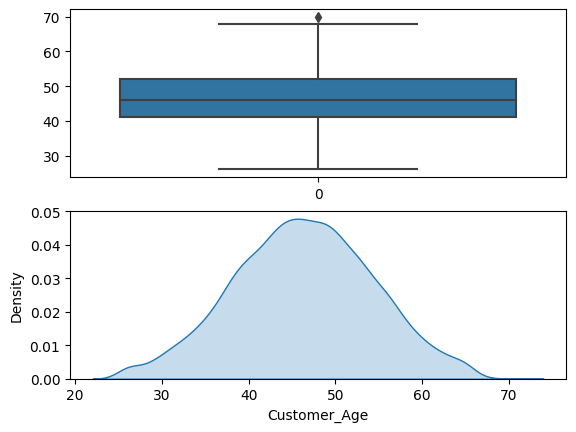

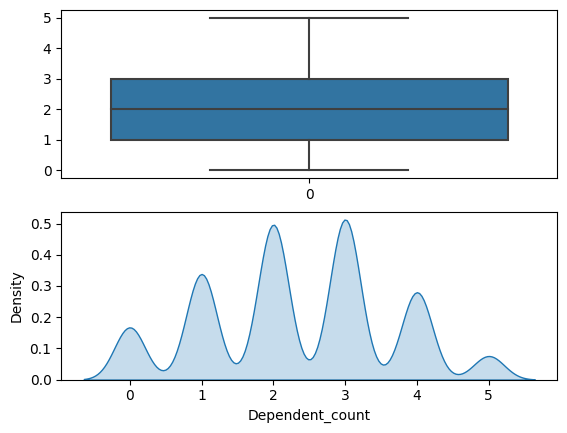

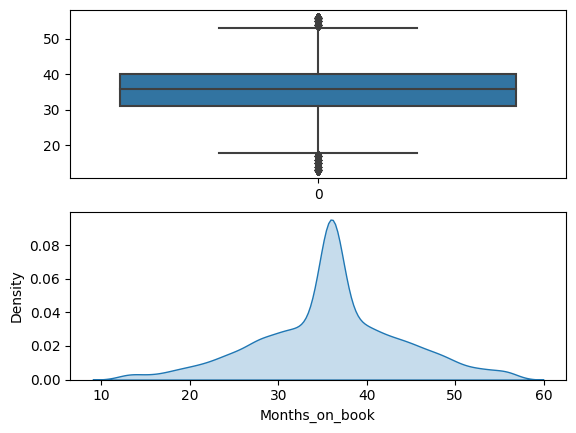

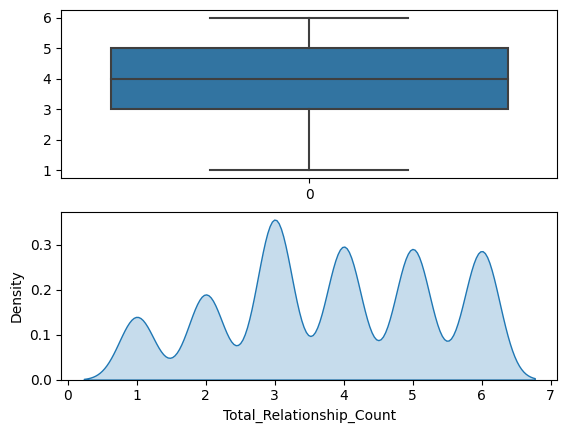

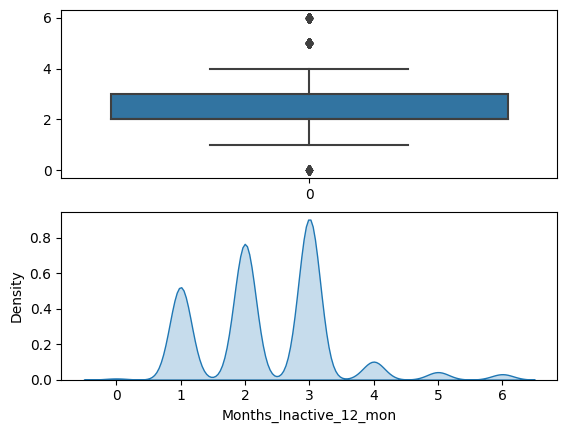

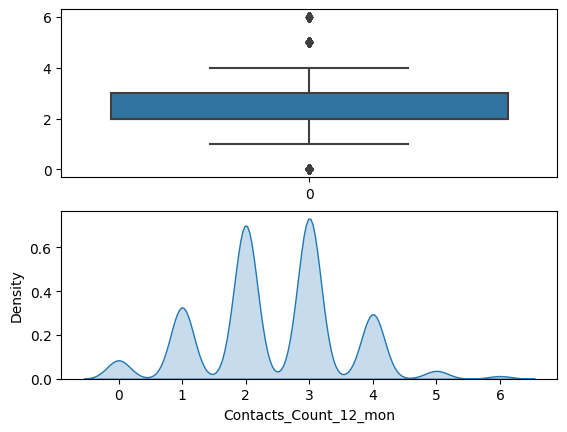

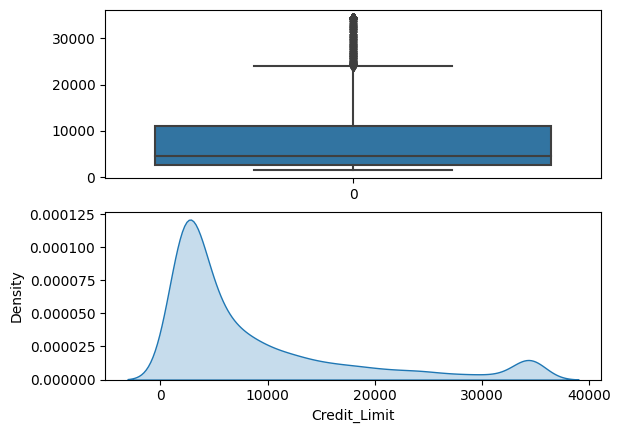

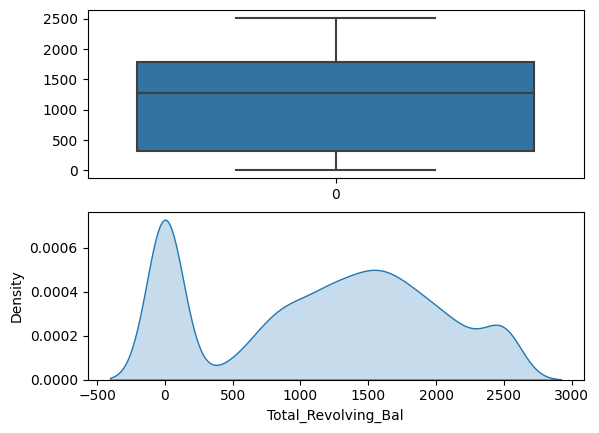

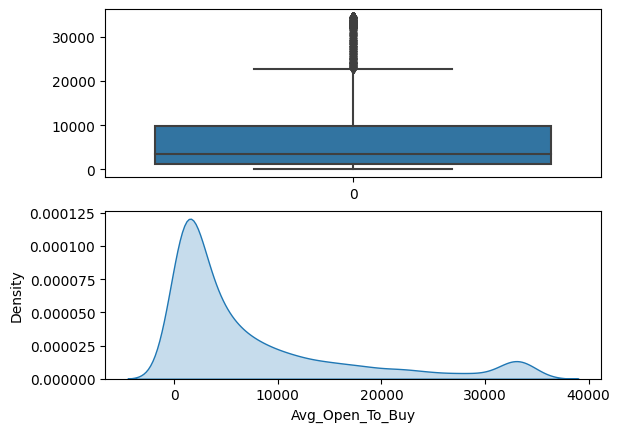

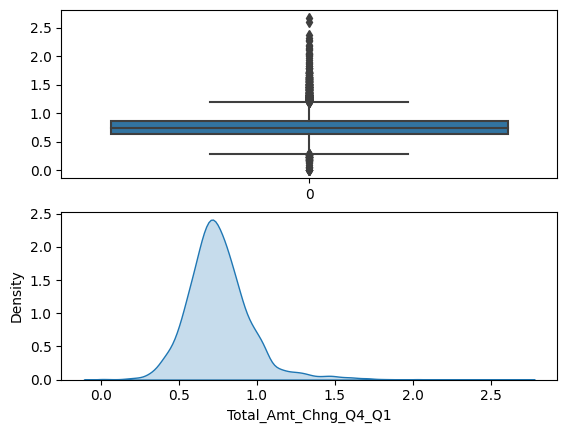

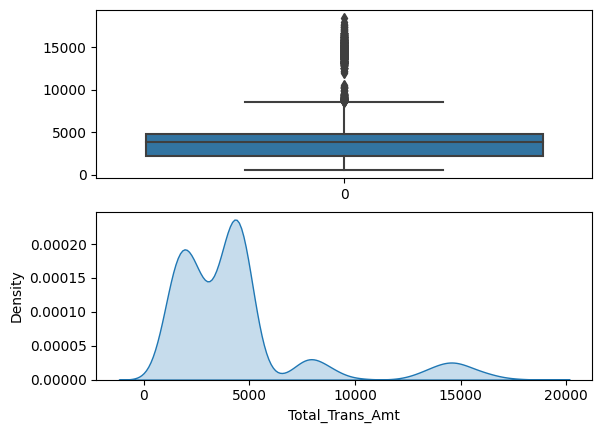

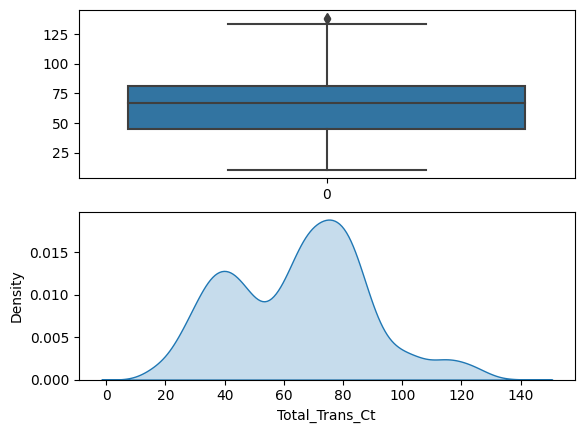

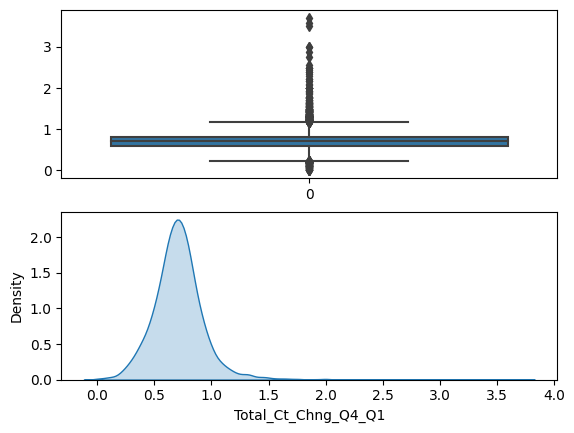

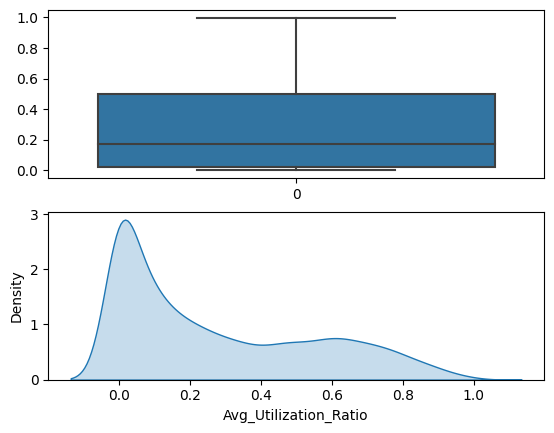

In [12]:
# Miramos si hay outliers gracias a los boxplot
warnings.filterwarnings('ignore')

for i in df.iloc[:, :14].columns:
  f, (ax_box, ax_kde) = plt.subplots(2)
  sns.boxplot(df[i], ax = ax_box)
  sns.kdeplot(df[i], ax = ax_kde, fill=True)

Las variables que tienen outliers son:

**Customer_age, Dependant_count, Total_Relationship_count, Tota_Revolving_Bal i Avg_Utilization_Ratio**

In [ ]:
X = df.drop(columns = ['Attrition_Flag'])
y = df.Attrition_Flag

In [ ]:
#Tranformamos los datos en función de si tienen o outliers
columns_no_out = ['Customer_Age', 'Dependent_count', 'Total_Relationship_Count', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']

X[columns_no_out] = MinMaxScaler().fit(X[columns_no_out]).transform(X[columns_no_out])

columns_out = X.drop(columns_no_out, axis=1)
columns_out = columns_out.columns

X[columns_out] = RobustScaler().fit(X[columns_out]).transform(X[columns_out])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45)

In [ ]:
params = {'n_estimators': range(200, 2000, 10),
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(10, 100),
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [ ]:
#Buscamos los mejores parámetros para el modelo 

rf = RandomForestClassifier(max_features='auto').fit(X_train, y_train)
rf_bp = RandomizedSearchCV(rf, params, cv=5).fit(X_train, y_train)
pred = rf_bp.predict(X_test)
f1 = f1_score(y_test, pred, average='macro')
print(f1)

0.9219946681117993


Con una puntuación de 0.92 podemos considerar que nuestro model es bueno. 

Ahora entrenaremos el modelo con todo el Dataframe 'Supply_chain_train'

In [ ]:
X_train = df.drop(columns = ['Attrition_Flag'])
y_train = df.Attrition_Flag

Importamos 'supply_chain_test.csv' y realizamos el mismo procesado que con el train

In [ ]:
X_test = pd.read_csv('supply_chain_test.csv', index_col='test_idx')
X_test = X_test.iloc[: , 1:]
X_test

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
test_idx,,,,,,,,,,,,,,,,,,,
0,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
1,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
2,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
3,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
4,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,34,M,2,Graduate,Single,$80K - $120K,Blue,29,3,1,3,13395.0,1678,11717.0,1.006,2650,69,0.865,0.125
2022,35,F,1,College,Single,Less than $40K,Blue,25,2,2,4,2231.0,1791,440.0,0.820,2576,42,0.750,0.803
2023,44,F,1,Uneducated,Divorced,Less than $40K,Blue,37,1,2,3,5594.0,1235,4359.0,0.549,5220,75,0.829,0.221


In [ ]:
X_test.isin(['Unknown']).any()

Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level              True
Marital_Status               True
Income_Category              True
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

In [ ]:
X_test.Income_Category.value_counts()

Less than $40K    972
$40K - $60K       337
$80K - $120K      298
$60K - $80K       280
$120K +           139
Name: Income_Category, dtype: int64

In [ ]:
X_test.Income_Category = X_test.Income_Category.replace('Unknown', 'Less than $40K')
X_test.Education_Level = X_test.Education_Level.replace('Unknown', 'Graduate')
X_test.Marital_Status = X_test.Marital_Status.replace('Unknown', 'Married')

In [ ]:
cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for col in cols:
  dummies = pd.get_dummies(X_test[col], prefix='', prefix_sep='')
  X_test = pd.concat([X_test, dummies], axis=1)
  X_test = X_test.drop(col, axis = 1)

In [ ]:
#Tranformamos los datos en función de si tienen o outliers de X_test
columns_no_out = ['Customer_Age', 'Dependent_count', 'Total_Relationship_Count', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']

X_test[columns_no_out] = MinMaxScaler().fit(X_test[columns_no_out]).transform(X_test[columns_no_out])

columns_out = X_test.drop(columns_no_out, axis=1)
columns_out = columns_out.columns

X_test[columns_out] = RobustScaler().fit(X_test[columns_out]).transform(X_test[columns_out])

In [ ]:
params = {'n_estimators': range(200, 2000, 10),
               'max_features': ['sqrt'],
               'max_depth': range(10, 100),
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [ ]:
#Buscamos los mejores parámetros y entrenamos el modelo 

rf = RandomForestClassifier(max_features='auto').fit(X_train, y_train)
rf_bp = RandomizedSearchCV(rf, params, cv=5).fit(X_train, y_train)
pred = rf_bp.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
#Guardamos los resultados en un df
prediction = pd.DataFrame(pred, columns=['target'])
prediction

,target
0,1
1,1
2,1
3,1
4,1
...,...
2021,1
2022,0
2023,1
2024,1


In [ ]:
#Lo exportamos como .json

prediction.to_json('Predicciones.json')